# Which Neighborhood is the Safest?
## By Team TT (Greg Betron, Alahna Moreno, Atara Montaque)
### Introduction:
To analyze the best neighborhood in Pittsburgh, we decided that safety is our number one priority. To approach this, we decided that various public services by the government was our best bet to determine which neighborhood would be kept the safest. Our first thoughts for datasets would be police and fire services. Neighborhoods with less police and fire activity means a neighborhood with less crime and less fires, so those were our first two metrics. The last metric was a little tough. We considered continuing with the 911 route, and going ambulance/EMS calls, but we decided that the metic wouldn't reflect safety very well. After all, a neighborhood with more elderly individuals would likely have much more calls. So, we opted to look at the amount of speed bumps in various neighborhoods. More speed bumps in a neighborhood would prevent speeding, making the neighborhoods safer.
### The Metric:
Our _neighborhood safety score_ was determined by the following metrics:
1. Least amount of fires per capita
2. Least amount of non-traffic related police citations per capita
3. Most number of speed bumps per capita

To do this, we used the following datasets:
1. [Fire Incidents](https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh/resource/8d76ac6b-5ae8-4428-82a4-043130d17b02) 

A collection of fire incident data as responded to by the Pittsburgh Bureau of Fire.

2. [Non-Traffic Citations](https://data.wprdc.org/dataset/non-traffic-citations/resource/6b11e87d-1216-463d-bbd3-37460e539d86) 

A collection of police citations for non-traffic related incidents.

3. [Speed Humps](https://data.wprdc.org/dataset/city-of-pittsburgh-speed-humps/resource/37b2ac41-ae8e-4de1-8405-157e05dc3640)

A collection of speed humps installed by the City of Pittsburgh to slow down traffic.

4. [Population](https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/82f29015-6905-4b1c-8300-afe9bb2231b3)

A collection of the population data from each neighborhood in the City of Pittsburgh, as recorded by the Census Bureau.

# Metric 1 - Fire Incidents

### Introduction

In this metric section, there is an analysis of the fire incidents in the city of Pittsburgh, as reported and responded to by the Pittsburgh Bureau of Fire, since the beginning of 2013. Less fire incidents in a neighborhood means that the neighborhood likely is up to better safety code and less arson or irresponsible fires.

The incidents are grouped by neighborhood, and the number of incidents per neighborhood is counted. Neighborhoods with high fire incident counts per capita are considered to be worse than neighborhoods with less fire incidents per capita.

In [1]:
# Importing all libraries for all metrics
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [2]:
# Analyze the data in the csv file using pandas, putting it into 'fireData'
fireData = pd.read_csv("FireData.csv", parse_dates=True)

Now, we are going to count the number of times there is a fire incident in each of the neighborhoods.

In [3]:
# This code looks into the pandas data set, and counts the number of rows for each individual 'neighborhood' column.
sortedFireData = fireData["neighborhood"].value_counts()
sortedFireData

Carrick                      289
Central Business District    274
South Side Flats             270
Squirrel Hill South          256
Hazelwood                    249
                            ... 
Ridgemont                     12
Mt. Oliver                    12
East Carnegie                 11
Regent Square                  9
Mount Oliver Borough           6
Name: neighborhood, Length: 91, dtype: int64

Let's split the data into the top and bottom 5 values, and look at them on a graph.

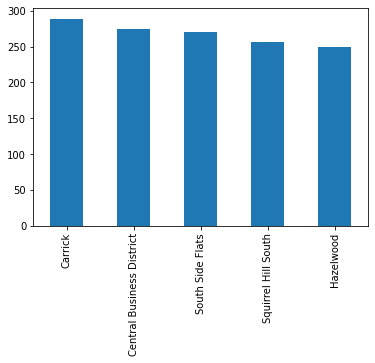

In [4]:
mostFires = sortedFireData.head()
leastFires = sortedFireData.tail()
pd.Series(mostFires).plot.bar()

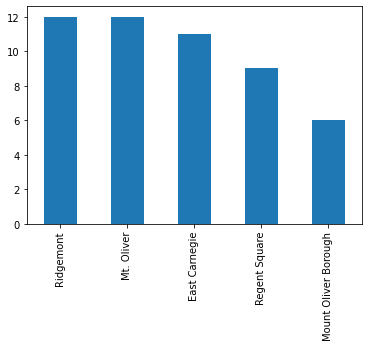

In [5]:
pd.Series(leastFires).plot.bar()

This is somewhat interesting, but it doesn't really tell us very well what the best/safest neighborhood. To get that information, we would need to compare the number of fires per capita. After all, it would make sense if a town with way more residents than another had more fires. So let's do that. First we will analyze the dataset of populations.

In [6]:
popData = pd.read_csv("PopulationData.csv", parse_dates=True)

In [7]:
newPopData = popData.drop(['_id','Id', 'Margin of Error; Total'], axis=1)
newPopData

,Neighborhood,Estimate; Total
0,Allegheny Center,1411.0
1,Allegheny West,343.0
2,Allentown,2558.0
3,Arlington,1852.0
4,Arlington Heights,272.0
...,...,...
86,Upper Lawrenceville,2754.0
87,West End,235.0
88,West Oakland,1717.0
89,Westwood,3537.0


That looks pretty good. We are almost ready to combine the datasets and determine what the least fires per capita are. But first, we will sort each neighborhood by population.

In [8]:
sortedNewPopData = newPopData.sort_values(by='Estimate; Total')
sortedNewPopData

,Neighborhood,Estimate; Total
21,Chateau,3.0
71,South Shore,12.0
57,North Shore,205.0
87,West End,235.0
78,St. Clair,270.0
...,...,...
15,Carrick,10122.0
76,Squirrel Hill North,11336.0
13,Brookline,13160.0
68,Shadyside,13562.0


As we can see, Chateau and South Shore have very few residents. As such, it wouldn't be very fair to compare the two to the others (more on this later). But for now, let's continue on. Now, we are going to focus on only the values in the population data. Their labels are gone, but that is fine since they are still in the same alphabetical order.

In [9]:
newPopData = newPopData['Estimate; Total'].squeeze()
newPopData

0     1411.0
1      343.0
2     2558.0
3     1852.0
4      272.0
       ...  
86    2754.0
87     235.0
88    1717.0
89    3537.0
90    1534.0
Name: Estimate; Total, Length: 91, dtype: float64

Now we make the fire data into a dataframe so it is easier to work with.

In [10]:
df = pd.DataFrame(sortedFireData)
df.head

<bound method NDFrame.head of                            neighborhood
Carrick                             289
Central Business District           274
South Side Flats                    270
Squirrel Hill South                 256
Hazelwood                           249
...                                 ...
Ridgemont                            12
Mt. Oliver                           12
East Carnegie                        11
Regent Square                         9
Mount Oliver Borough                  6

[91 rows x 1 columns]>

Then sort them into alphabetical order so the indices of the population and fire datasets match.

In [11]:
sortedFireData = sortedFireData.sort_index()
sortedFireData

Allegheny Center        62
Allegheny West          43
Allentown              127
Arlington               51
Arlington Heights       13
                      ... 
Upper Lawrenceville     52
West End                23
West Oakland            62
Westwood                28
Windgap                 23
Name: neighborhood, Length: 91, dtype: int64

Now we divide each number of fires with each population, giving us fires/person, or fires per capita!

In [12]:
firesPerCap = sortedFireData.div(newPopData.values)
firesPerCap.sort_index()

Allegheny Center       0.043940
Allegheny West         0.125364
Allentown              0.049648
Arlington              0.027538
Arlington Heights      0.047794
                         ...   
Upper Lawrenceville    0.018882
West End               0.097872
West Oakland           0.036109
Westwood               0.007916
Windgap                0.014993
Name: neighborhood, Length: 91, dtype: float64

Now that we've got our final dataset, let's look at it on a bar chart.

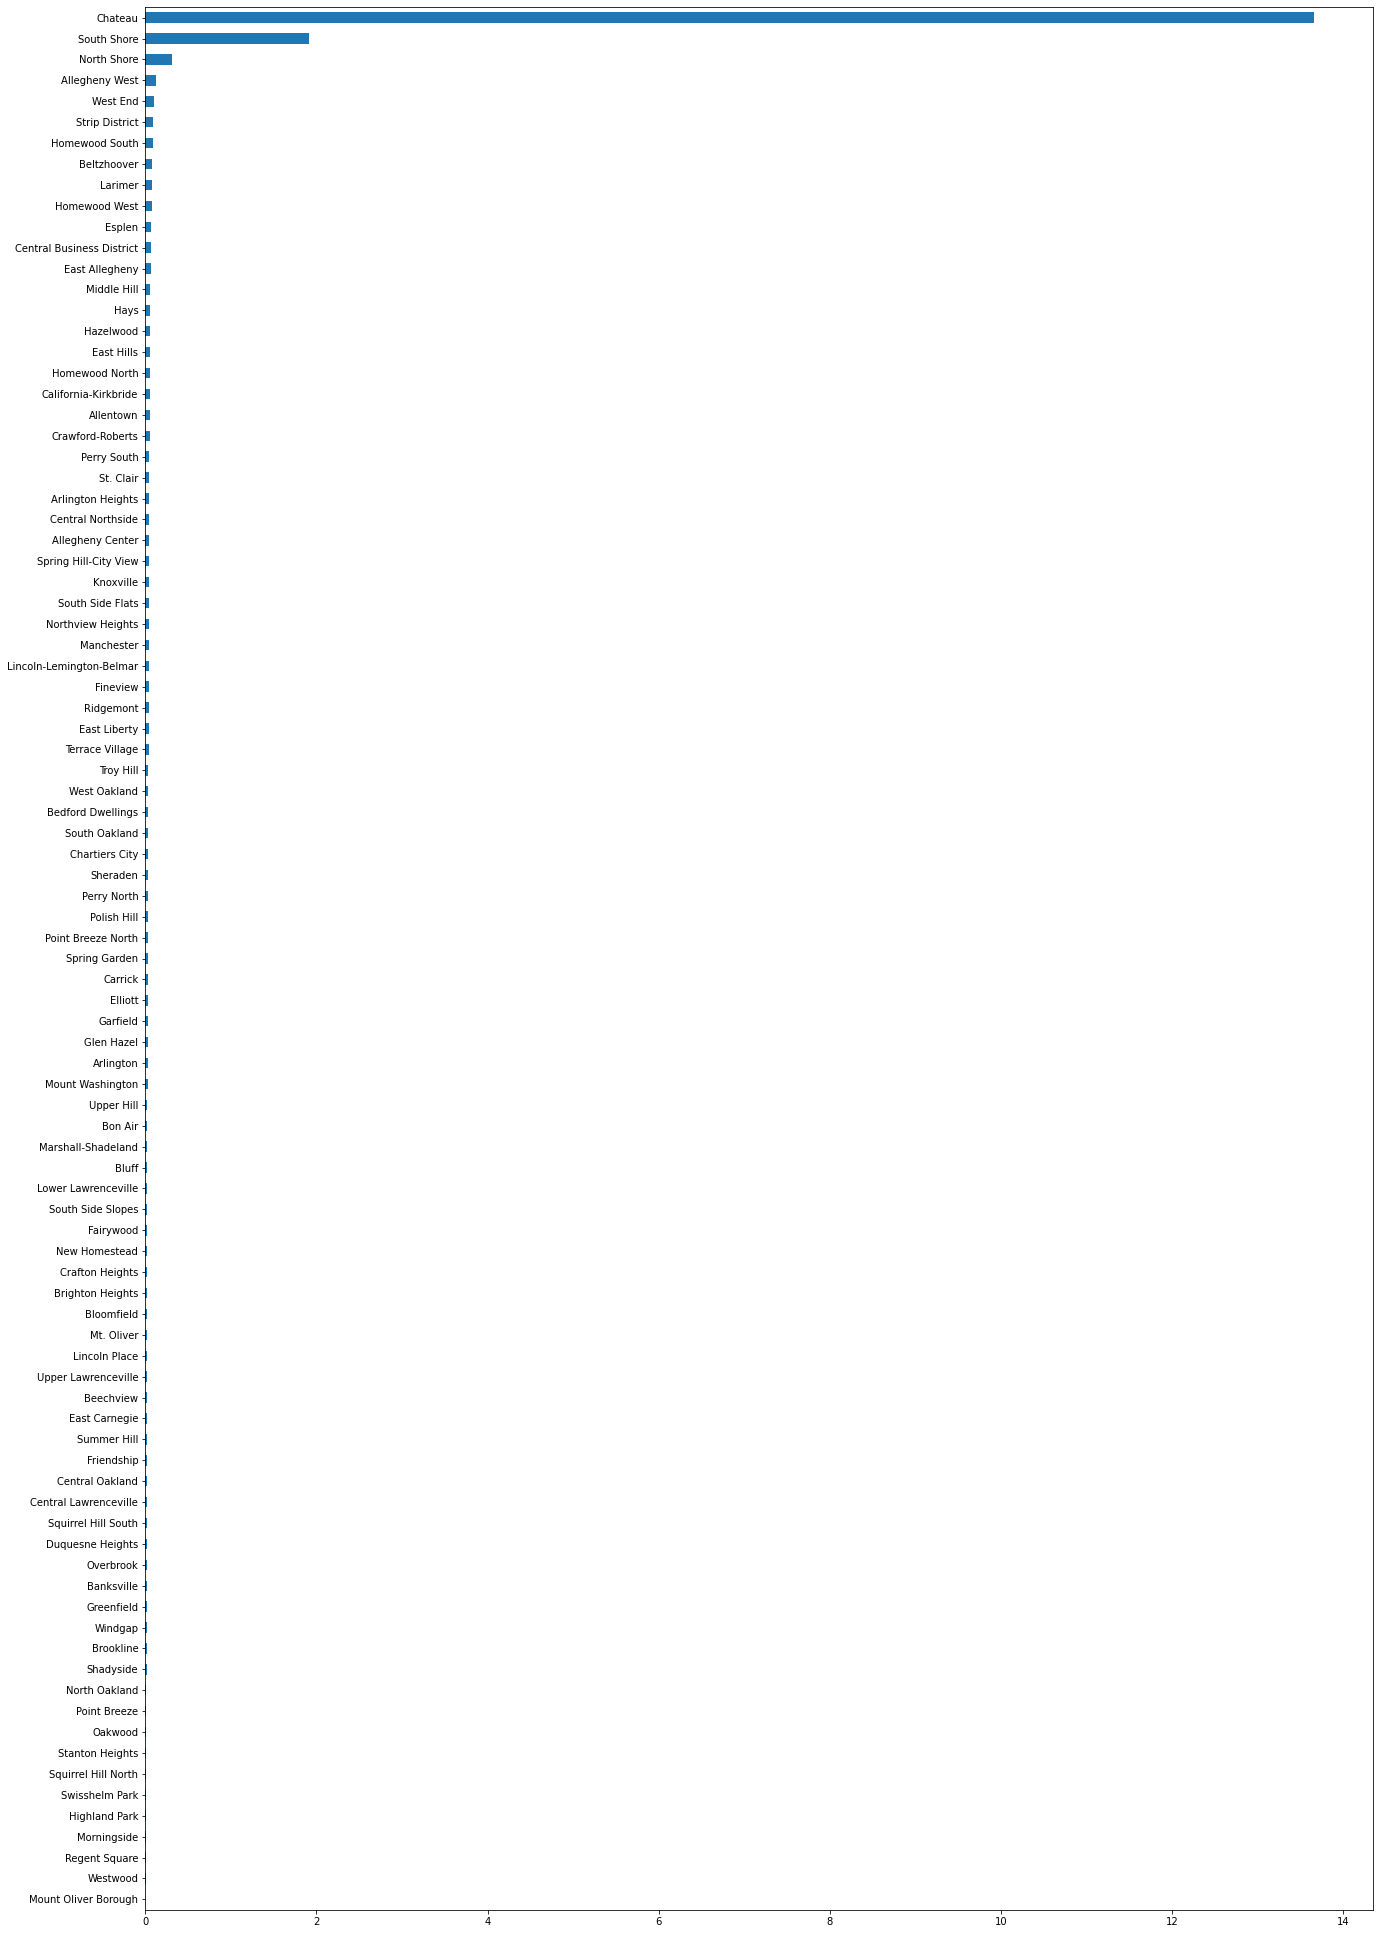

In [13]:
firesPerCap = firesPerCap.sort_values()
firesPerCap.plot(kind='barh', figsize=(22,35))

Not very surprisingly, Chateau and South shore having an extremely low recorded population skews the data set too heavily. As such, they will not be considered for this dataset. Lets look at the final ranking on a bar chart.

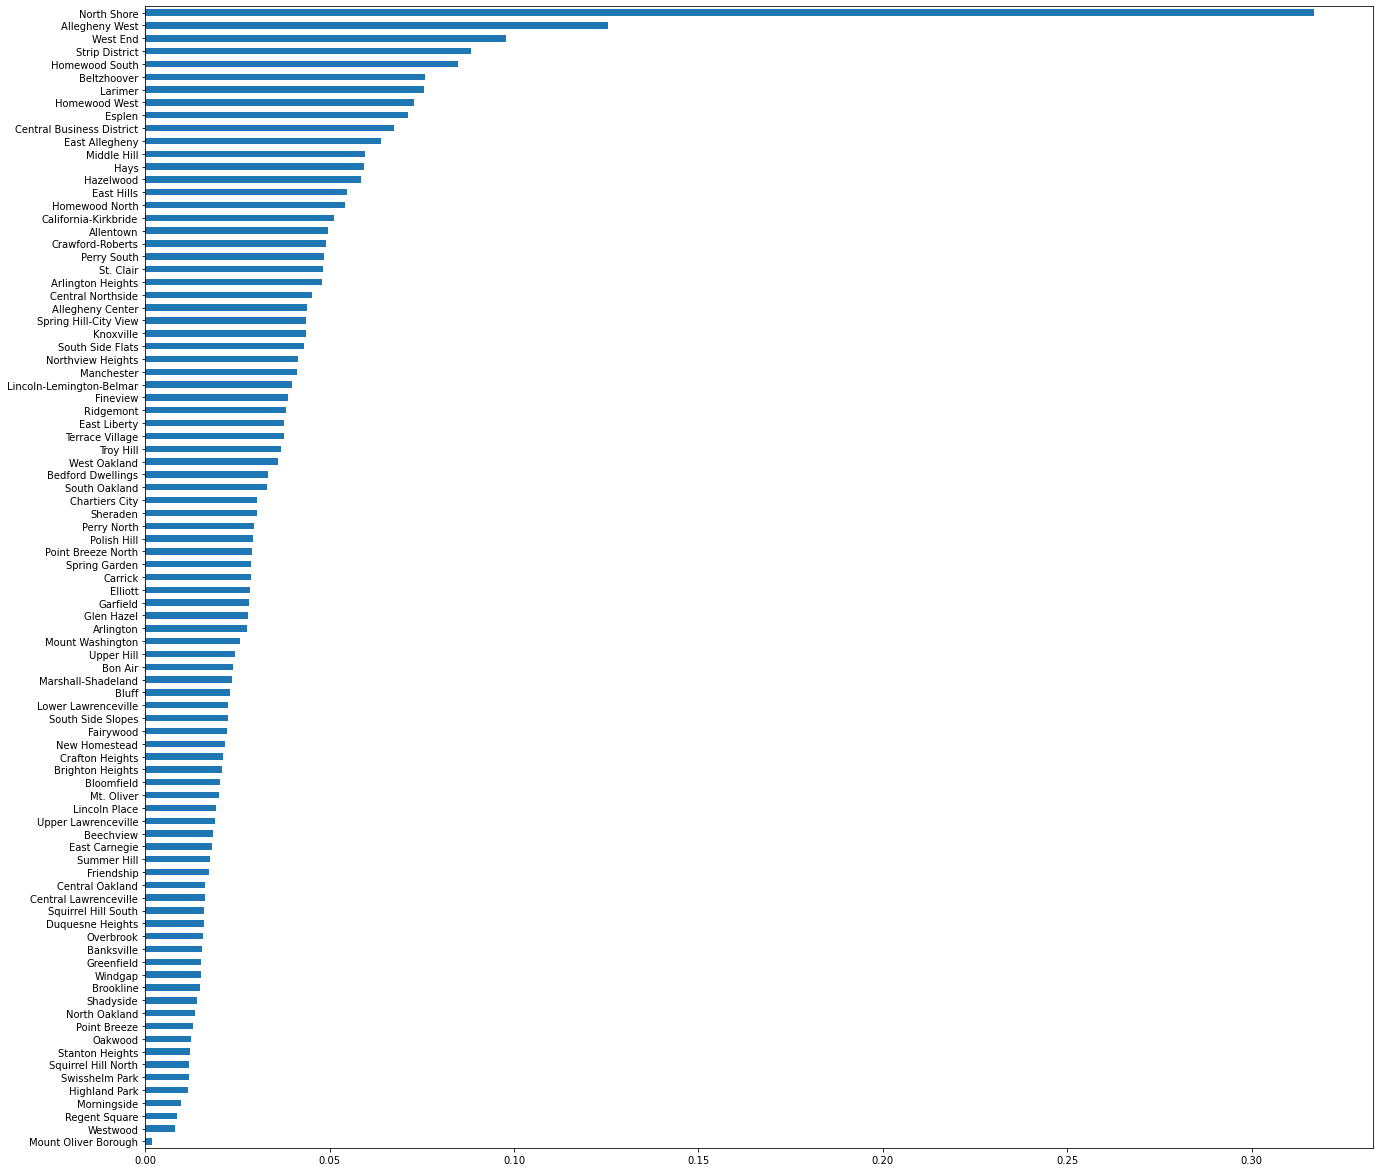

In [14]:
droppedFiresPerCap = firesPerCap.drop(['South Shore', 'Chateau'])
droppedFiresPerCap.plot(kind='barh', figsize=(22,21))

In [15]:
droppedFiresPerCap

Mount Oliver Borough    0.001765
Westwood                0.007916
Regent Square           0.008712
Morningside             0.009810
Highland Park           0.011454
                          ...   
Homewood South          0.084798
Strip District          0.088353
West End                0.097872
Allegheny West          0.125364
North Shore             0.317073
Name: neighborhood, Length: 89, dtype: float64

So, there are the top 5 and bottom 5 fires per capita (not including outliers).

The top 5 safest based on fires is:
1. Mount Oliver Borough
2. Westwood
3. Regent Square
4. Morningside
5. Highland Park

The bottom 5 (least safe) based on fires is:
1. North Shore
2. Allegheney West
3. West End
4. Strip District
5. Homewood South

# Metric 2 - Non-Traffic Citations
### Introduction:
For this analysis, we looked at the number of citations in each of Pittsburgh's neighborhoods. This provides a good metric to see what the relative safety level of each area is, and therefore which neighborhood would be best to live in. The citations vary from littering to disorderly conduct, but I wasn't able to get a decent graph to show the distribution because of how many different kinds are listed in the dataset.

Here is a general look at the spreadsheet.

In [16]:
chart = pd.read_csv('CitationsSpread.csv')
chart

,_id,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1078081,16157849,M,B,29.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
1,2,1078082,16157849,M,W,21.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
2,3,1078083,16159579,NaN,NaN,NaN,2016-08-25T11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,Allegheny Center,1,2204,NaN,NaN,NaN,NaN
3,4,1078084,16159780,M,B,22.0,2016-08-25T16:42:00,"7200 Block FRANKSTOWN AV PITTSBURGH, PA","6501(a)(1) Scattering Rubbish; Any waste, dang...",Homewood South,5,1303,9.0,2.0,-79.896254,40.457329
4,5,1078085,16161591,F,W,22.0,2016-08-28T00:58:00,"6100 Block BERLIN WY PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,Upper Lawrenceville,2,1011,7.0,2.0,-79.946664,40.485403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16290,26807,1105891,23179537,F,B,28.0,2023-11-12T00:54:00,"1700 Block E CARSON ST PITTSBURGH, PA",5505 Public Drunkenness,NaN,3,NaN,3.0,3.0,-79.981872,40.428593
16291,26808,1105892,23179537,F,B,28.0,2023-11-12T00:54:00,"1700 Block E CARSON ST PITTSBURGH, PA",601.12 Interference with Official Duties,NaN,3,NaN,3.0,3.0,-79.981872,40.428593
16292,26809,1105893,23179983,F,W,23.0,2023-11-12T23:31:00,"E CARSON ST & S 13TH ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,3.0,3.0,-79.985330,40.428783
16293,26810,1105894,23180037,F,B,24.0,2023-11-13T02:08:00,"S 17TH ST & E CARSON ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,3.0,3.0,-79.982051,40.428843


The first thing I did was organize the neighborhoods based on the number of citations per neighborhood and put them in alphabetical order.

In [17]:
# neighbor_citat = chart.groupby('NEIGHBORHOOD').count().reset_index()
# print(neighbor_citat)

neighbor_citat = chart.groupby('NEIGHBORHOOD')['_id'].count().reset_index()
neighbor_citat.columns = ['Neighborhood', 'Number of Citations']
neighbor_citat.set_index('Neighborhood', inplace=True)
neighbor_citat

,Number of Citations
Neighborhood,
Allegheny Center,157
Allegheny West,24
Allentown,191
Arlington,102
Arlington Heights,7
...,...
Upper Lawrenceville,35
West End,31
West Oakland,63


Next, I organized them by number of citations. As you can see, South Side Flats has the greatest number of citations by far at 3453, while Outside State and Outside County only have 2.

In [18]:
sorted = chart["NEIGHBORHOOD"].value_counts()
sorted.to_csv('CitationCount.csv')
sorted


South Side Flats             3453
Central Business District    2027
Central Oakland               665
North Shore                   577
Carrick                       456
                             ... 
St. Clair                       3
Mt. Oliver Boro                 3
Chartiers City                  3
Outside State                   2
Outside County                  2
Name: NEIGHBORHOOD, Length: 97, dtype: int64

Since there were so many values, I took the top and bottom 10 neighborhoods to give a clearer look at where each neighborhood falls

In [19]:
most = sorted.iloc[0:9]
least = sorted.iloc[87:]

After South Side Flats and the Central Business District, you can see that the number of citations falls dramatically, which makes sense since South Side Flats has a large concentration of bars and restaurants, which would obviously result in a lot of incidents, and the Central Business District has a lot of general foot traffic.

In [20]:
most

South Side Flats             3453
Central Business District    2027
Central Oakland               665
North Shore                   577
Carrick                       456
East Allegheny                360
Mount Washington              329
Brookline                     310
Shadyside                     304
Name: NEIGHBORHOOD, dtype: int64

The neighborhoods with the least amount of citations are also unsurprising given that these are some of the least populated neighborhoods of Pittsburgh. Arlington Heights for example, only has a population of 244. Later on, I'll analyze the number of citations per capita.

In [21]:
least

Arlington Heights          7
Summer Hill                7
Swisshelm Park             6
Ridgemont                  4
Mt. Oliver Neighborhood    4
St. Clair                  3
Mt. Oliver Boro            3
Chartiers City             3
Outside State              2
Outside County             2
Name: NEIGHBORHOOD, dtype: int64

Before that, here's a bar graph showing the citations per neighborhood. Once again, South Side Flats clearly has way more citations than any other neighborhood, which makes the graph kind of hard to read.

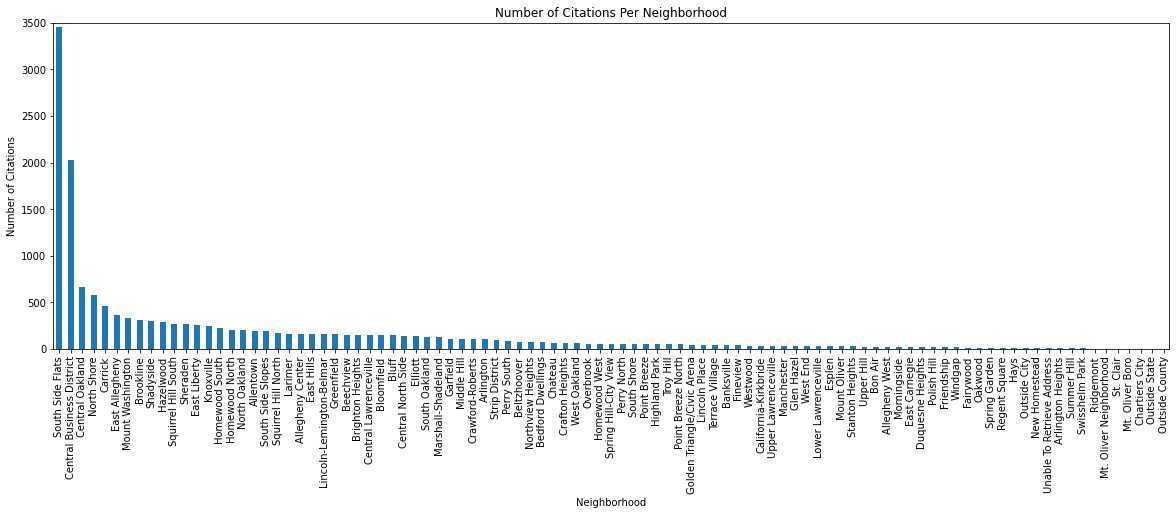

In [22]:
plt.figure(figsize=(20,6))

chart['NEIGHBORHOOD'].value_counts().plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Citations')
plt.title('Number of Citations Per Neighborhood')
plt.xticks(rotation=90)
plt.ylim(0,3500)
plt.show()

To make it a little easier, I removed South Side Flats and limited the number of neighborhoods to the top 40.

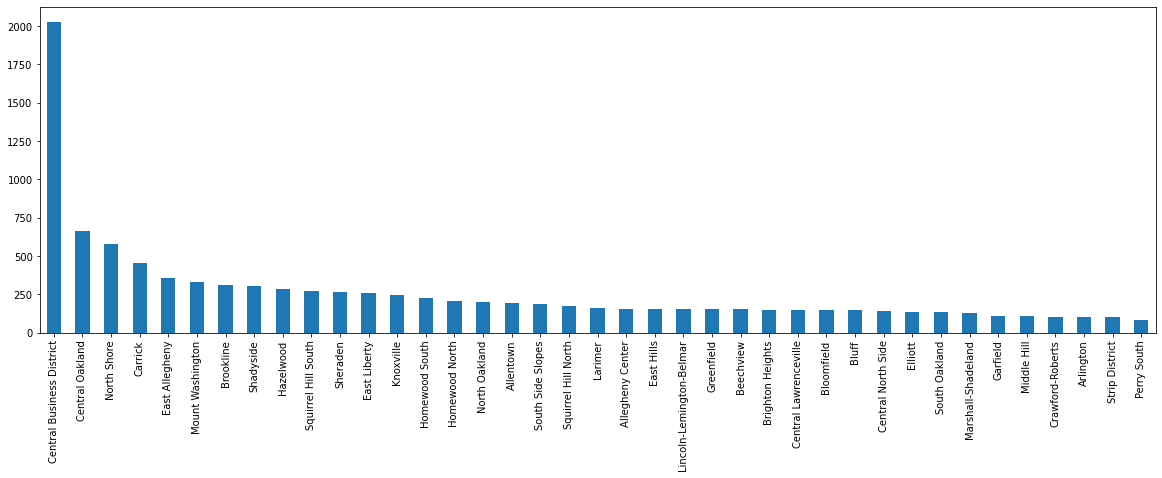

In [23]:
signif = sorted.iloc[1:40]
plt.figure(figsize=(20,6))
signif.plot.bar()

Here are the neighborhoods from Northview Heights onwards.

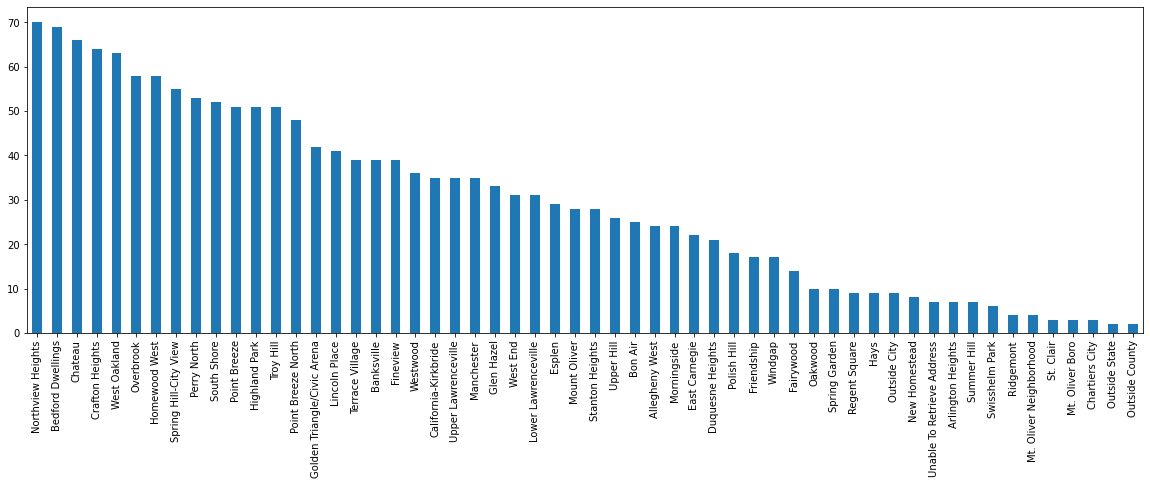

In [24]:
test = sorted.iloc[41:]
plt.figure(figsize=(20,6))
test.plot.bar()

And here are the neighborhoods with the top 10 most citations including South Side Flats.

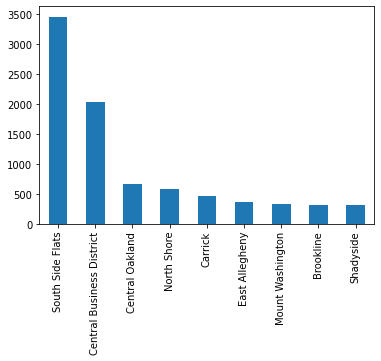

In [25]:
pd.Series(most).plot.bar()


And the least amount of citations.

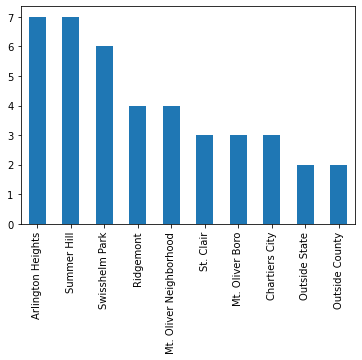

In [26]:
pd.Series(least).plot.bar()

As I said earlier, a lot of the data is skewed due to population differences, so I took a database with the populations for each neighborhood to see the number of citations per capita.

In [27]:
pop = pd.read_csv("PopulationData.csv", parse_dates=True)
pop = pop.drop(['_id','Id', 'Margin of Error; Total'], axis=1).sort_values(by='Estimate; Total')
pop.set_index('Neighborhood', inplace=True)

Once I had this, I had to merge to two tables. Somehow the population dataset had 6 fewer neighborhoods than the citation dataset, so there ended up being a few neighborhoods without population data.

In [28]:
pop = pop.sort_index()
pop

,Estimate; Total
Neighborhood,
Allegheny Center,1411.0
Allegheny West,343.0
Allentown,2558.0
Arlington,1852.0
Arlington Heights,272.0
...,...
Upper Lawrenceville,2754.0
West End,235.0
West Oakland,1717.0


In [29]:
neighbor_citat
df = pd.DataFrame(neighbor_citat)
df

,Number of Citations
Neighborhood,
Allegheny Center,157
Allegheny West,24
Allentown,191
Arlington,102
Arlington Heights,7
...,...
Upper Lawrenceville,35
West End,31
West Oakland,63


In [30]:
neighbor_citat = pd.DataFrame(neighbor_citat)
merged = neighbor_citat.merge(pop, how='left', left_on='Neighborhood', right_on='Neighborhood')
#merged
df = pd.DataFrame(merged)
df

,Number of Citations,Estimate; Total
Neighborhood,,
Allegheny Center,157,1411.0
Allegheny West,24,343.0
Allentown,191,2558.0
Arlington,102,1852.0
Arlington Heights,7,272.0
...,...,...
Upper Lawrenceville,35,2754.0
West End,31,235.0
West Oakland,63,1717.0


This is where I calculated the citation number per capita, but they're currently sorted alphabetically instead of numerically.

In [31]:
capita = df.iloc[:,0].div(df.iloc[:,1])
capita.sort_index()

Neighborhood
Allegheny Center       0.111269
Allegheny West         0.069971
Allentown              0.074668
Arlington              0.055076
Arlington Heights      0.025735
                         ...   
Upper Lawrenceville    0.012709
West End               0.131915
West Oakland           0.036692
Westwood               0.010178
Windgap                0.011082
Length: 97, dtype: float64

Once they're sorted, Chateau far outweighs the other neighborhoods in terms of citations per capita with an insane 22 citations per person. However, Chateau only has a population of 3 in the dataset, so this makes sense. Although it's less extreme, South Shore's high number is also caused by a low population (12 people), so they both need to be removed to prevent the data from being skewed.

In [32]:
cit_cap = capita.sort_values()
cit_cap.iloc[0:88]

Neighborhood
Swisshelm Park                0.004461
Chartiers City                0.005357
Summer Hill                   0.005877
Stanton Heights               0.005881
Morningside                   0.007357
                               ...    
Central Business District     0.499261
South Side Flats              0.548792
North Shore                   2.814634
South Shore                   4.333333
Chateau                      22.000000
Length: 88, dtype: float64

When removing the outliar, South Shore and North Shore far outweight the others, with South Side Flats and Central business District, the original neighborhoods with the highest citations, coming in 2nd and 3rd respectively.

In [33]:
capita_prune = cit_cap.iloc[0:86]
capita_prune

Neighborhood
Swisshelm Park               0.004461
Chartiers City               0.005357
Summer Hill                  0.005877
Stanton Heights              0.005881
Morningside                  0.007357
                               ...   
Strip District               0.135207
East Allegheny               0.171838
Central Business District    0.499261
South Side Flats             0.548792
North Shore                  2.814634
Length: 86, dtype: float64

Now we can finally look at the real top and bottom 10 neighborhood. 

In [34]:
best = capita_prune.iloc[0:10]
best

Neighborhood
Swisshelm Park      0.004461
Chartiers City      0.005357
Summer Hill         0.005877
Stanton Heights     0.005881
Morningside         0.007357
Highland Park       0.007489
New Homestead       0.008222
Duquesne Heights    0.008327
Regent Square       0.008712
Friendship          0.009239
dtype: float64

In [35]:
worst = capita_prune.iloc[76:]
worst

Neighborhood
Larimer                      0.097502
Homewood South               0.099736
Allegheny Center             0.111269
Central Oakland              0.114222
West End                     0.131915
Strip District               0.135207
East Allegheny               0.171838
Central Business District    0.499261
South Side Flats             0.548792
North Shore                  2.814634
dtype: float64

From the table and graphs we can see that Swisshelm Park is the best neighborhood, while North Shore is by far the worst neighborhood (ignoring Chateau and South Shore as outliars).

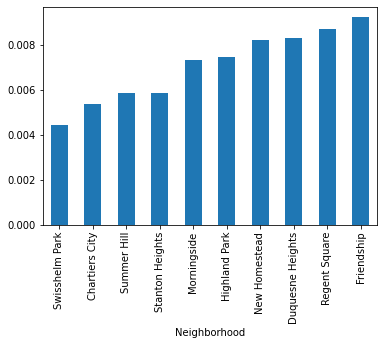

In [36]:
best.plot.bar()

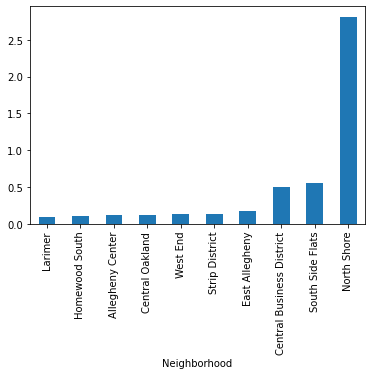

In [37]:
worst.plot.bar()

**Top 5 Best Neighborhoods:**
1. Swisshelm Park
2. Chartiers City
3. Summer Hill
4. Stanton Heights
5. Morningside

**Top 5 Worst Neighborhoods**
1. North Shore
2. South Side Flats
3. Central Business District
4. East Allegheny
5. Strip District

# Metric 3 - Speed Humps
### Introduction

The metric I will use to define bestness is Speed humps. Speed humps are great to enhance traffic safety and create pedestrian-friendly environments. The neighborhood that has a higher presence of speed humps per capita will be considered the best neighborhood. My analysis will utilize the Speed Humps DataSet and Population Dataset.

In [38]:
# First import libraries I need
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
#Load the CSV file into a DataFrame
dfSpeedHumps = pd.read_csv('Speed_Humps.csv')

Here's a sample of the dataset

In [40]:
dfSpeedHumps.head(10)

,_id,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,34,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,67,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,68,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,69,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355
5,100,25169591,10,4224.0,Saline St,4673,Asphalt,Squirrel Hill South,5,15,42003141400,3,15,4,2-15,40.422239,-79.926208
6,101,2056880845,11,2146.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.391643,-79.999307
7,102,1735565853,12,2082.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.392425,-79.999259
8,103,857069875,13,2013.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.393264,-79.999401
9,104,1822275525,14,1937.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.394180,-79.999611


In [41]:
# Group the data by neighborhood and count the number of speed humps in each neighborhood
neighborhood_speed_humps = dfSpeedHumps.groupby('neighborhood')['hump_id'].count().reset_index()
neighborhood_speed_humps.columns = ['Neighborhood', 'Number_of_Speed_Humps']

print("\nNumber of Speed Humps in Each Neighborhood:")
print(neighborhood_speed_humps)


Number of Speed Humps in Each Neighborhood:
           Neighborhood  Number_of_Speed_Humps
0            Bloomfield                      3
1             Brookline                      4
2               Carrick                      9
3       Central Oakland                      1
4              Garfield                      3
5         Highland Park                      2
6        Homewood South                      4
7      Mount Washington                      3
8         North Oakland                      6
9             Overbrook                      1
10          Perry North                      4
11          Polish Hill                      6
12     South Side Flats                      3
13    South Side Slopes                      4
14  Squirrel Hill North                      3
15  Squirrel Hill South                     18
16      Stanton Heights                      1
17           Upper Hill                      4


---

Let's look at this information on a bar chart

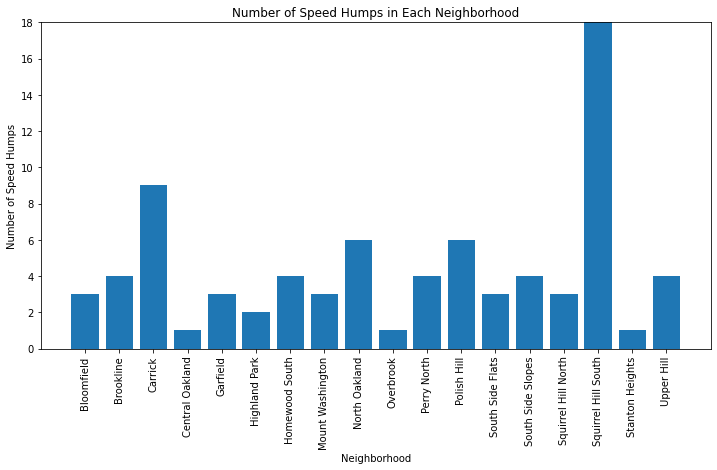

In [42]:
plt.figure(figsize=(12, 6))
plt.bar(neighborhood_speed_humps['Neighborhood'], neighborhood_speed_humps['Number_of_Speed_Humps'])
plt.xlabel('Neighborhood')
plt.ylabel('Number of Speed Humps')
plt.title('Number of Speed Humps in Each Neighborhood')
plt.ylim(0, 18)  # Set the y-axis limits
plt.xticks(rotation=90)
plt.show()

Let's rearrange this and visualize it in descending order  

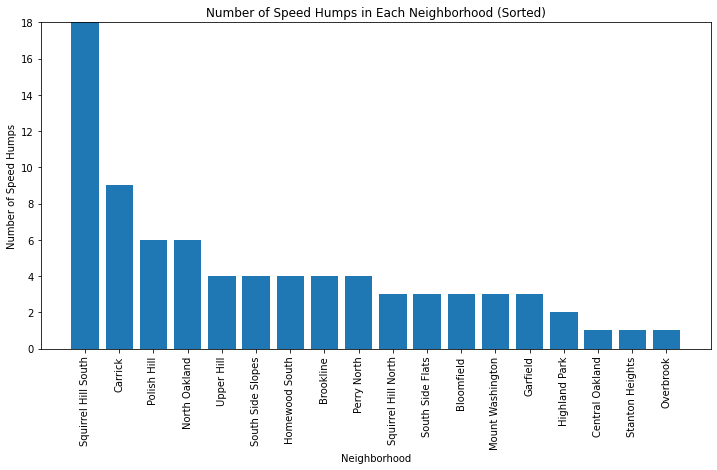

In [43]:
# Sort the data from highest to lowest number of speed humps
neighborhood_speed_humps_sorted = neighborhood_speed_humps.sort_values(by='Number_of_Speed_Humps', ascending=False)

# Visualize the sorted data
plt.figure(figsize=(12, 6))
plt.bar(neighborhood_speed_humps_sorted['Neighborhood'], neighborhood_speed_humps_sorted['Number_of_Speed_Humps'])
plt.xlabel('Neighborhood')
plt.ylabel('Number of Speed Humps')
plt.title('Number of Speed Humps in Each Neighborhood (Sorted)')
plt.ylim(0, 18) 
plt.xticks(rotation=90)
plt.show()

 It appears that  Squirrel Hill South has the highest number of speed humps,but it's important to consider the population of each neighborhood to understand the distribution of speed humps relative to the number of residents and their potential impact on pedestrian safety.

In [44]:
# Load Dataset and remove unnecessary columns
popData = pd.read_csv("PopulationData.csv", parse_dates=True)

newPopData = popData.drop(['_id','Id', 'Margin of Error; Total'], axis=1)
newPopData

,Neighborhood,Estimate; Total
0,Allegheny Center,1411.0
1,Allegheny West,343.0
2,Allentown,2558.0
3,Arlington,1852.0
4,Arlington Heights,272.0
...,...,...
86,Upper Lawrenceville,2754.0
87,West End,235.0
88,West Oakland,1717.0
89,Westwood,3537.0


Let's just work with the neighborhoods from our earlier analysis

In [45]:
#filter the population data to get the neighborhood's from speed humps analysis
neighborhoods_of_interest = neighborhood_speed_humps['Neighborhood'].unique()

filtered_newPopData = newPopData[newPopData['Neighborhood'].isin(neighborhoods_of_interest)]

filtered_newPopData

,Neighborhood,Estimate; Total
9,Bloomfield,8669.0
13,Brookline,13160.0
15,Carrick,10122.0
19,Central Oakland,5822.0
34,Garfield,3966.0
39,Highland Park,6810.0
41,Homewood South,2276.0
53,Mount Washington,8743.0
56,North Oakland,9602.0
60,Overbrook,3682.0


Great! Now that we have our neighborhoods and their estimated population, we can find the average number of speed humps per person in each neighborhood to see which neighborhood prioritizes  safety the most relative to its population size

In [46]:
# Merge the speed humps data with the population data
merged_data = pd.merge(neighborhood_speed_humps_sorted, newPopData, on='Neighborhood')

# Calculate average speed humps per capita
merged_data['Avg_Speed_Humps_Per_Capita'] = merged_data['Number_of_Speed_Humps'] / merged_data['Estimate; Total']

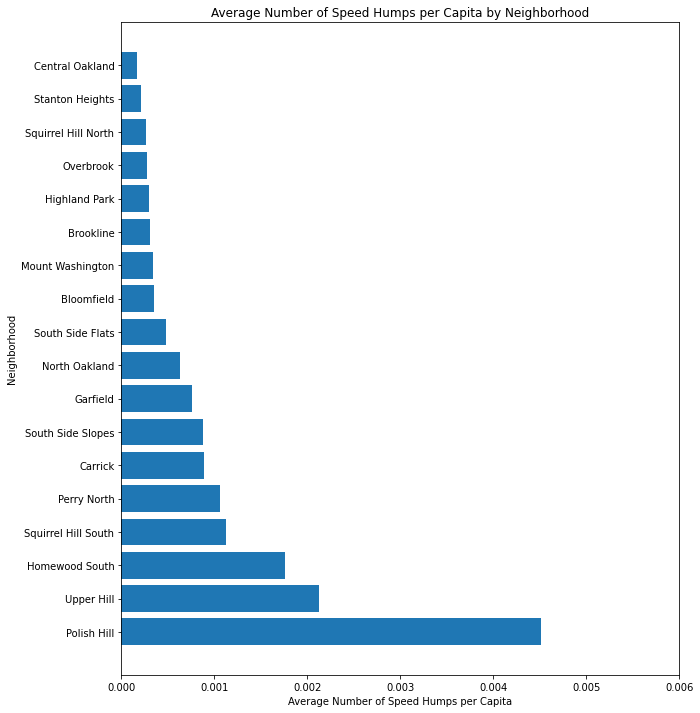

In [47]:
# Sort the data by the average speed humps per capita
merged_data_sorted = merged_data.sort_values(by='Avg_Speed_Humps_Per_Capita', ascending=False)

#Visualize
plt.figure(figsize=(10, 12))
plt.barh(merged_data_sorted['Neighborhood'], merged_data_sorted['Avg_Speed_Humps_Per_Capita'])
plt.xlabel('Average Number of Speed Humps per Capita')
plt.ylabel('Neighborhood')
plt.title('Average Number of Speed Humps per Capita by Neighborhood')
plt.xlim(right=0.006)  
plt.show()

Top 3 Safest neighborhoods: 
1. Polish Hill
2. Upper Hill
3. Homewood South

Polish Hill has the highest number of speed humps per capita, indicating a strong focus on pedestrian safety and potentially leading to lower levels of speeding vehicles, making it a safer place to live.

# Conclusion - The Neighborhood Safety Score

To measure the safest neighborhood, we need to combine each of our metrics. Here, we face somewhat of a challenge. The speed bumps dataset contains much fewer entries than the other two. Because of that, we are going to combine the fire and police citations set, by adding each neighborhood's ranking to in the two metrics. So, if a neighborhood ranked 5 for least fires and 2 for least police citations, that neighborhood's score would be 7. The lowest score would be considered best. After this, if there is a close competition, speed bumps will be used to decide which neighborhood is best.

In [48]:
counter = 1
safetyDict = {}
for i, v in droppedFiresPerCap.items():
    if i in capita_prune.index:
        safetyDict[i] = counter
        counter += 1
counter = 1
for i, v in capita_prune.items():
    safetyDict[i] = safetyDict[i] + counter
    counter += 1
safetyScore = pd.Series(safetyDict)
safetyScore = safetyScore.sort_values()

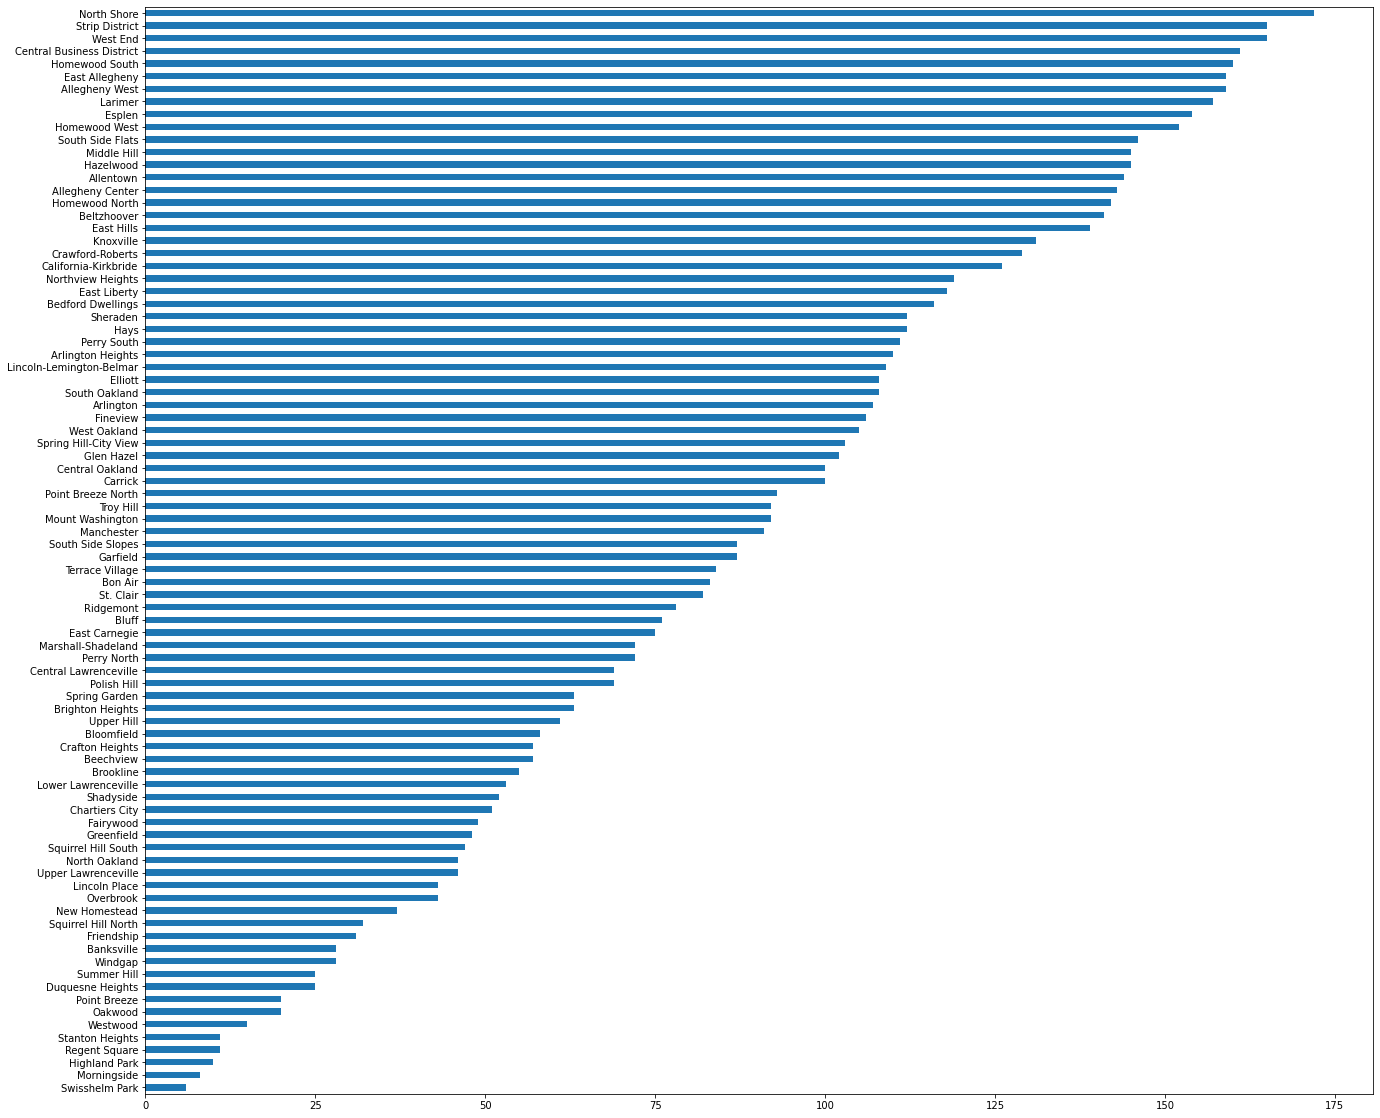

In [49]:
safetyScore.plot(kind='barh', figsize=(22,20))

In [50]:
safetyScore

Swisshelm Park                 6
Morningside                    8
Highland Park                 10
Regent Square                 11
Stanton Heights               11
                            ... 
Homewood South               160
Central Business District    161
West End                     165
Strip District               165
North Shore                  172
Length: 86, dtype: int64

Through analyzing the placement of neighborhoods in the fire and police citations datasets, we find that our top 5 neighborhoods are:
1. Swisshelm Park
2. Morningside
3. Highland Park
4. Regent Square
5. Stanton Heights

And the bottom 5 neighborhoods are:
1. North Shore
2. Strip District
3. West End
4. Central Business District
5. Homewood South

Out of the top and bottom 5 neighborhoods, only Stanton Heights and Homewood South are included in the speed humps dataset. We do not consider this to have enough context to compare it with other neighborhoods on the list, so we are going to leave our list as is. Therefore, the definitive best neighborhood for safety is...
# Swisshelm Park

![confetti](confetti.gif)

## Conclusions:

### Greg Betron: 
Using the data we found, the "best neighborhood" solely looked at the safety of a neighborhood. Although this is an important factor to consider while choosing where to live, there is more to a neighborhood than that. A neighborhood can be relatively safe, but not the safest, and have much more character or things to do. Swisshelm Park, our "safest neighborhood" seems to simply be a quiet suburb with little happening. Although this has its benefits, it is not where I would necessarily want to live at my current stage of life. My favorite neighborhood would be North Oakland. Although I am certainly biased, being a Pitt student and living in North Oakland right now, I think it has a lot to offer. North Oakland ranks relatively high on our neighborhood safety scale, but it also has many museums, food stops, green areas, and a dense population that offers many different perspectives. So although it may not top the safety list, it would be my top neighborhood choice.

### Alahna Moreno:
<br>I'm not from Pittsburgh, but from the images I've seen Swisshelm Park, it makes sense that it has the least citations. It seems to be mainly houses, small shops, and a playground, so it makes sense that there aren't many incidents occuring there. North Shore being the worst is more surprising, especially given that it surpassed South Side Flats and Central Business District.North Shore does have Acrisure Stadium, which would likely produce a lot of problems during football games or concerts. Overall, citation number is a good representation of neighborhood safety. Most of the citations were for public drunkenness, which can lead to various other incidents like drunk driving or violence. Finding neighborhoods with low citation numbers can not only help people avoid the incidents with the citations, but any crimes that could be caused by them.


## Atara Montaque:

Swisshelm Park appears to be a pleasant, peaceful neighborhood with relatively few incidents of fire and citations as we determined. There was no appearence of this neighborhood in my speed humps dataset due to its relatively low number of neighborhood entries. My personal favorite neighborhood is Shadyside, where I live. Shadyside offers a great balance of amenities and a peaceful atmosphere, with plenty of restaurants, stores, and grocery stores nearby. The residential area has a quiet feel. Having lived on Forbes Avenue last year, Central Oakland having the lowest number of speed humps, is not suprising as accidents are frequent there. 

## Thank you!
## Questions?